In [5]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = yf.download('NFLX', start='2022-01-01', end='2025-09-28')

assert df is not None

/var/folders/nl/1zt_x2492zq3mm3dtgmv97k00000gn/T/ipykernel_24029/2146523238.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('NFLX', start='2022-01-01', end='2025-09-28')
[*********************100%***********************]  1 of 1 completed


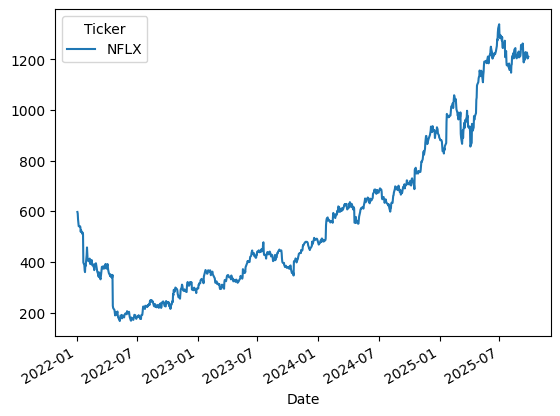

In [10]:
df['Close'].plot()
plt.show()

KeyError: "None of ['Date'] are in the columns"